In [1]:
#Las Siguientes lineas no requieren de ninguna modificación, 
#son las librerias necesarias para el funcionamiento de la libreta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import matplotlib.colors as colors
from pylab import * 
output_notebook()
colores = list(colors._colors_full_map.values())
from sklearn.metrics import r2_score

#archivo1='../Thingsboard/unidos_2.csv'

#columnas  = ['ts','A3','A4','A5','A6','T3','T4']

archivo1='../Thingsboard/filtrados_8minutos_Arduino_adquisidor.csv'


columnas1  = ['ts','T3','T4','A1','A2','A3','A4','A5']

def importa(archivo,columnas):
    
    tmp = pd.read_csv(archivo,header=None,sep=',',names = columnas,skiprows=1)
    #tmp = pd.read_csv(archivo,header=None,sep=',',names = columnas,skiprows=200)
    tmp=tmp.set_index('ts')
    tmp=tmp.dropna()
    return tmp


Loading BokehJS ...

In [3]:
datos=importa(archivo1,columnas1)
#datos.drop(['A3','T3','A5','A6'], axis=1, inplace=True)
datos.index=pd.to_datetime(datos.index,format='%d/%m/%Y  %H:%M')

#datos.index=pd.to_datetime(datos.index,format='%Y-%m-%d  %H:%M:%S')
datos

,T3,T4,A1,A2,A3,A4,A5
ts,,,,,,,
2020-04-02 12:38:00,24.5625,23.6250,26.92,25.87,24.52,24.31,24.03
2020-04-02 12:48:00,24.6875,23.7500,26.96,26.02,24.66,24.37,24.12
2020-04-02 12:58:00,24.7500,23.8125,27.15,26.22,24.74,24.43,24.07
2020-04-02 13:08:00,24.8750,23.9375,27.30,26.36,24.78,24.50,24.18
2020-04-02 13:18:00,24.9375,24.0000,27.38,26.45,24.93,24.49,24.06
...,...,...,...,...,...,...,...
2020-04-08 00:58:00,24.5625,24.5000,25.32,25.09,25.19,25.06,24.91
2020-04-08 01:08:00,24.5000,24.5000,25.21,25.04,25.09,25.02,24.93
2020-04-08 01:18:00,24.5000,24.5000,25.08,25.11,25.14,25.07,24.88


T3 comparado con A3


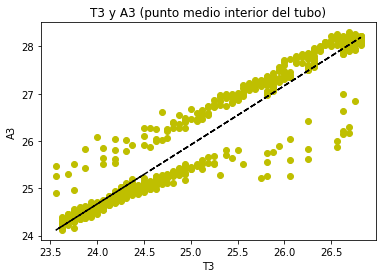

m: 1.252092711126366 b: -5.383508405003266 r2:  0.9068366067642712 
 

A3 comparado con T3


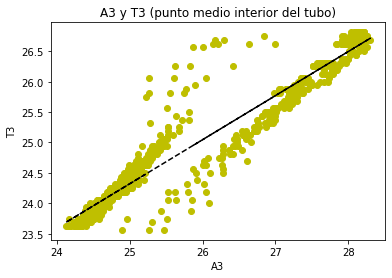

m: 0.7242567572719861 b: 6.2162558344092975 r2:  0.9068366067642712


In [16]:
print('T3 comparado con A3')
x=datos.T3
y=datos.A2
m,b = polyfit(x, y, 1) 
modelo=polyfit(x, y, 1)
predecir=np.poly1d(modelo)
err_2=r2_score(y,predecir(x))

plot(x, y, 'yo', x, m*x+b, '--k') 

plt.title('T3 y A3 (punto medio interior del tubo)')
plt.xlabel('T3')
plt.ylabel('A3')
show() 

print('m:',m,'b:',b, 'r2: ',err_2, '\n \n')

print('A3 comparado con T3')
x=datos.A2
y=datos.T3
m,b = polyfit(x, y, 1) 
modelo=polyfit(x, y, 1)
predecir=np.poly1d(modelo)
err_2=r2_score(y,predecir(x))

plot(x, y, 'yo', x, m*x+b, '--k') 

plt.title('A3 y T3 (punto medio interior del tubo)')
plt.ylabel('T3')
plt.xlabel('A3')
show() 

print('m:',m,'b:',b, 'r2: ',err_2)

T3 comparado con A3


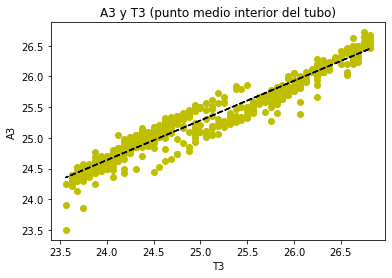

m: 0.6462427437247011 b: 9.127192469893068 r2:  0.9547427542372342 
 

A3 comparado con T3


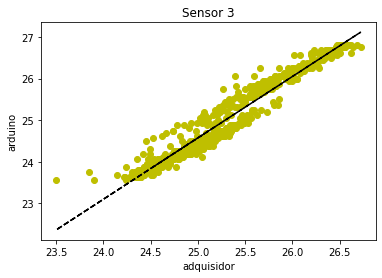

m: 1.4773748154361517 b: -12.358620046882448 r2:  0.9547427542372341


In [5]:
print('T3 comparado con A3')
x=datos.T3
y=datos.A3
m,b = polyfit(x, y, 1) 
modelo=polyfit(x, y, 1)
predecir=np.poly1d(modelo)
err_2=r2_score(y,predecir(x))

plot(x, y, 'yo', x, m*x+b, '--k') 

plt.title('A3 y T3 (punto medio interior del tubo)')
plt.xlabel('T3')
plt.ylabel('A3')
show() 

print('m:',m,'b:',b, 'r2: ',err_2, '\n \n')

print('A3 comparado con T3')
x=datos.A3
y=datos.T3
m,b = polyfit(x, y, 1) 
modelo=polyfit(x, y, 1)
predecir=np.poly1d(modelo)
err_2=r2_score(y,predecir(x))

plot(x, y, 'yo', x, m*x+b, '--k') 

plt.title('Sensor 3')
plt.ylabel('arduino')
plt.xlabel('adquisidor')
show() 

print('m:',m,'b:',b, 'r2: ',err_2)

A3 comparado con T4


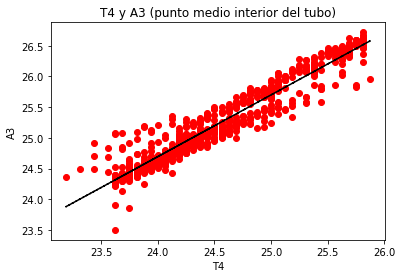

m: 1.0057133940822995 b: 0.556765993146493 r2:  0.9270511007812018 
 

T4 comparado con A3


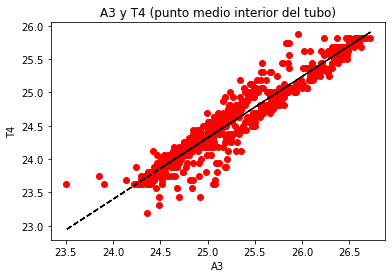

m: 0.9217845822040815 b: 1.2743321545585236 r2:  0.9270511007812019


In [6]:

print('A3 comparado con T4')
x=datos.T4
y=datos.A3
m,b = polyfit(x, y, 1) 
modelo=polyfit(x, y, 1)
predecir=np.poly1d(modelo)
err_2=r2_score(y,predecir(x))

plot(x, y, 'ro', x, m*x+b, '--k') 

plt.title('T4 y A3 (punto medio interior del tubo)')
plt.xlabel('T4')
plt.ylabel('A3')
show() 

print('m:',m,'b:',b, 'r2: ',err_2, '\n \n')

print('T4 comparado con A3')
x=datos.A3
y=datos.T4
m,b = polyfit(x, y, 1) 
modelo=polyfit(x, y, 1)
predecir=np.poly1d(modelo)
err_2=r2_score(y,predecir(x))

plot(x, y, 'ro', x, m*x+b, '--k') 

plt.title('A3 y T4 (punto medio interior del tubo)')
plt.ylabel('T4')
plt.xlabel('A3')
show() 

print('m:',m,'b:',b, 'r2: ',err_2)

T4 comparado con A4


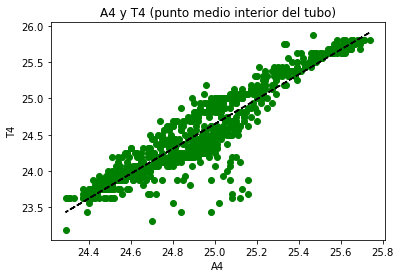

m: 1.7101164612729467 b: -18.104807735596868 r2:  0.8611000475354844 
 

A4 comparado con T4


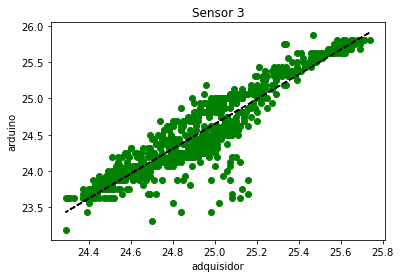

m: 1.7101164612729467 b: -18.104807735596868 r2:  0.8611000475354844


In [7]:
print('T4 comparado con A4')
y=datos.T4
x=datos.A4
m,b = polyfit(x, y, 1) 
modelo=polyfit(x, y, 1)
predecir=np.poly1d(modelo)
err_2=r2_score(y,predecir(x))

plot(x, y, 'go', x, m*x+b, '--k') 

plt.title('A4 y T4 (punto medio interior del tubo)')
plt.xlabel('A4')
plt.ylabel('T4')
show() 

print('m:',m,'b:',b, 'r2: ',err_2, '\n \n')

print('A4 comparado con T4')
y=datos.T4
x=datos.A4
m,b = polyfit(x, y, 1) 
modelo=polyfit(x, y, 1)
predecir=np.poly1d(modelo)
err_2=r2_score(y,predecir(x))

plot(x, y, 'go', x, m*x+b, '--k') 

plt.title('Sensor 3')
plt.ylabel('arduino')
plt.xlabel('adquisidor')
show() 

print('m:',m,'b:',b, 'r2: ',err_2)

T4 comparado con A5


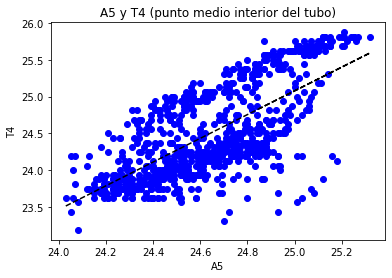

m: 1.6142597738475806 b: -15.278003396866136 r2:  0.48268762416596256 
 

A5 comparado con T4


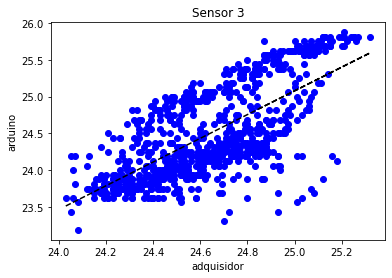

m: 1.6142597738475806 b: -15.278003396866136 r2:  0.48268762416596256


In [8]:
print('T4 comparado con A5')
y=datos.T4
x=datos.A5
m,b = polyfit(x, y, 1) 
modelo=polyfit(x, y, 1)
predecir=np.poly1d(modelo)
err_2=r2_score(y,predecir(x))

plot(x, y, 'bo', x, m*x+b, '--k') 

plt.title('A5 y T4 (punto medio interior del tubo)')
plt.xlabel('A5')
plt.ylabel('T4')
show() 

print('m:',m,'b:',b, 'r2: ',err_2, '\n \n')

print('A5 comparado con T4')
y=datos.T4
x=datos.A5
m,b = polyfit(x, y, 1) 
modelo=polyfit(x, y, 1)
predecir=np.poly1d(modelo)
err_2=r2_score(y,predecir(x))

plot(x, y, 'bo', x, m*x+b, '--k') 

plt.title('Sensor 3')
plt.ylabel('arduino')
plt.xlabel('adquisidor')
show() 

print('m:',m,'b:',b, 'r2: ',err_2)